# Exercise 3.1

First of all, we import usefull libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

Now, we import data we want to fit to a linear function.

In [2]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176])

y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121])

We're fitting our variables to a linear funtion as: $y = ax + b$

So, we're solving next system of equations, where $\alpha$ is an additinal parameter: $w = (X^TX + \alpha \dot W)^{-1} X^T y$.

We define a function in order to calculate N-folds cross validation, so we use only one element as test dataset in each iteration. For simplicity, we define Fit function.

In [3]:
def Fit(x_old, y_old, alpha):
    N = len(x_old)
    x_old = x_old.reshape(N, 1)
    x = np.asmatrix(np.c_[np.ones((N, 1)), x_old])
    y = y_old.reshape(N,1)
    return np.linalg.inv(x.T * x + alpha * I) * x.T * y

def Distance(a, b):
    return np.linalg.norm(a - b)

def Cross_validation(x, y, alpha):
    N = len(x)
    errors = np.zeros(N)
    
    for i in range(N):
        x_train = np.delete(x, i)
        y_train = np.delete(y, i)
        w = Fit(x_train, y_train, alpha)
        errors[i] = Distance(y[i], x[i] * w[1] + w[0])   

    return np.mean(errors)

Now, we proceed to sum up all this functions, so we obtain the best value for alpha, as well as fitting parameters.

In [4]:
I = np.identity(2) # Return the identity matrix of size [2, 2]
alpha = np.array([0.02, 0.05, 0.07, 0.10, 0.50, 2., 5., 100.])
N_alpha = len(alpha)

w = np.zeros([N_alpha, 2])
errors_alpha = np.zeros(N_alpha)

for i in range(N_alpha):
    aux = Fit(x, y, alpha[i])
    
    w[i, 0] = aux[0]
    w[i, 1] = aux[1]
    errors_alpha[i] = Cross_validation(x, y, alpha[i])
    print('With alpha =', alpha[i], 'we obtain: [a, b] =', np.round(w[i], 2))

print('The best alpha is:', alpha[np.argmin(errors_alpha)])

With alpha = 0.02 we obtain: [a, b] = [-156.55    1.48]
With alpha = 0.05 we obtain: [a, b] = [-130.23    1.33]
With alpha = 0.07 we obtain: [a, b] = [-117.1     1.26]
With alpha = 0.1 we obtain: [a, b] = [-101.72    1.17]
With alpha = 0.5 we obtain: [a, b] = [-36.98   0.8 ]
With alpha = 2.0 we obtain: [a, b] = [-10.91   0.66]
With alpha = 5.0 we obtain: [a, b] = [-4.53  0.62]
With alpha = 100.0 we obtain: [a, b] = [-0.23  0.6 ]
The best alpha is: 0.02


Now, we proceed to compare the results by using ${\it RidgeCV}$, a buit-in function from sklearn library. So, we're getting the best alpha from our array. We're using Generalized Cross-Validation, $cv = 15$, as we did in the function from scratch. We see that we obtain the same result.

In [5]:
_x_ = x.reshape(15, 1)
_x_ = np.asmatrix(np.c_[np.ones((15, 1)), _x_])
_y_ = y.reshape(15,1)

clf = RidgeCV(alphas = alpha, cv = 15).fit(_x_, _y_)
print('Alpha =', clf.alpha_)

Alpha = 0.02


Now, we proceed to plot this results, so we can see if there is or not a big difference between different alphas. 

As we can see, the bigger the alpha is, the more weigh alpha has; and the smaller it is, the more it looks like the normal linear fitting.

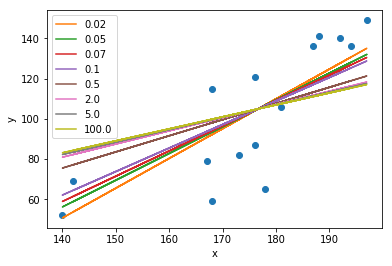

In [6]:
plt.plot(x, y, 'o')

for i in range(N_alpha):
    plt.plot(x, x * w[i, 1] + w[i, 0], label = alpha[i])

plt.legend(loc = 'best')
plt.xlabel(u'x')
plt.ylabel(u'y')
plt.show()